# VISUALISATION RADAR

## Définition

#### Exemples en image de visualisation en radar

https://www.google.com/search?q=radar+plot+examples+in+python&source=lnms&tbm=isch&sa=X&ved=2ahUKEwj78ru2gcrpAhVJ6RoKHdP9AQAQ_AUoAXoECAwQAw&biw=1682&bih=909

Il y a plusieurs affichages ici nous verrons uniquement l'affichage dans un cercle.

### Import packages and librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

## Comment construire sa toile d'araignée

S'agissant d'un graphe dans un cercle il faudrait :

    1- Définir les axes : les caractéristiques des variables à afficher
    2-  Le cercle et la taille du cercle 
    3- Puis customiser les plots

##  Exemple : dataset  Messi and Ronaldo's 6 Ultimate Team data points from FIFA 18

In [2]:
Messi = {'Pace':89,'Shooting':90,'Passing':86,'Dribbling':95,'Defending':26,'Physical':61}
Ronaldo = {'Pace':90,'Shooting':93,'Passing':82,'Dribbling':90,'Defending':33,'Physical':80}

data = pd.DataFrame([Messi,Ronaldo], index = ["Messi","Ronaldo"])
data

,Pace,Shooting,Passing,Dribbling,Defending,Physical
Messi,89,90,86,95,26,61
Ronaldo,90,93,82,90,33,80


###  1- Lister les axes : les caractéristiques  des variables à afficher

In [3]:
Attributes =list(data)# la liste des colonnes
AttNo = len(Attributes) # le nombre de variables totale
print(AttNo)
Attributes

6


['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']

#### Choix sur une variable 

In [4]:
ronaldo = data.iloc[1].tolist()
ronaldo += ronaldo [:1]
ronaldo

[90, 93, 82, 90, 33, 80, 90]

### 2- Le Cercle

#### L'angle entre les  lignes 

In [5]:
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]
angles

[0.0,
 1.0471975511965976,
 2.0943951023931953,
 3.141592653589793,
 4.1887902047863905,
 5.235987755982989,
 0.0]

### 3- Puis customiser les plots, La figure

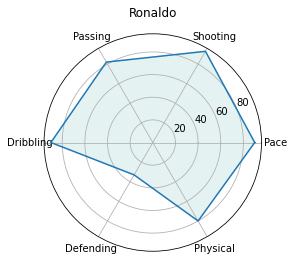

In [6]:
ax = plt.subplot(111, polar= True)

plt.xticks(angles[:-1],Attributes) # Afficher  le nom des variables 
ax.fill(angles, ronaldo, 'teal', alpha=0.1) # Remplir la zone de tracé
ax.set_title("Ronaldo") # mettre un titre 

ax.plot(angles,ronaldo) # affiche la figure les angles et les valeurs 
plt.show() # supprime le texte indésirable sur la figure.

## Comparons 2 variables

Ajoutons Messi

In [7]:
messi = data.iloc[0].tolist()
messi += messi [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

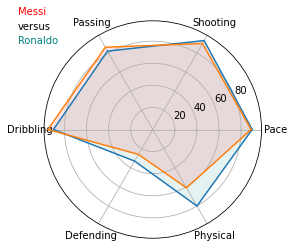

In [8]:
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1],Attributes)

ax.plot(angles,ronaldo)
ax.fill(angles, ronaldo, 'teal', alpha=0.1)

ax.plot(angles2,messi)
ax.fill(angles2, messi, 'red', alpha=0.1)

# AJOUTONS DES LEGENDES
plt.figtext(0.2,0.9,"Messi",color="red")
plt.figtext(0.2,0.85,"versus")
plt.figtext(0.2,0.8,"Ronaldo",color="teal")


plt.show()

# Interprétation du graphe 

# Exemple_2 :  Dataset Startups

In [11]:
startup = pd.read_csv("D:\FRANCE 20 MAI 2018\DATA SCIENCES\DATABASE UPLOADED\MES EXPORTS_PERSO\\50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Définissons notre dataset avec les variables et caractéristiques a étudier

In [12]:
dataset = startup.groupby(startup.State)["R&D Spend", "Administration", "Marketing Spend", "Profit"].mean()

dataset = dataset.transform(lambda x: x / 10000) # pour diminuer l'échelle de visualisation (facultatif je pense)
dataset = dataset.round(decimals=2, out=None)

dataset

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,6.47,12.07,18.25,10.39
Florida,8.07,12.18,24.73,11.88
New York,7.62,12.15,20.53,11.38


#### Nos caractéristiques 

In [14]:
Attributes = [x for x in dataset.columns]
AttNo = len(Attributes) # le nombre de variables totale
print(AttNo)
Attributes

4


['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

#### Nos variables et Angles 

In [15]:
california  = dataset.iloc[1].tolist()
california += california [:1]
angles1 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles1 += angles1 [:1]

florida  = dataset.iloc[1].tolist()
florida += florida [:1]
angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

new_york  = dataset.iloc[1].tolist()
new_york += new_york [:1]
angles3 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles3 += angles3 [:1]

#### Notre Toile d' Araignée

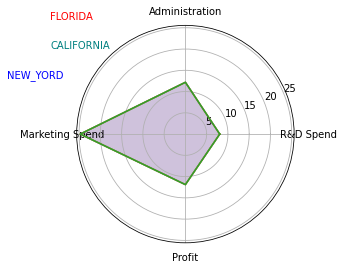

In [16]:
ax = plt.subplot(111, polar=True)
plt.xticks(angles1[:-1],Attributes)

ax.plot(angles1,california)
ax.fill(angles1, california, 'teal', alpha=0.1)


ax.plot(angles2,florida)
ax.fill(angles2, florida, 'red', alpha=0.1)


ax.plot(angles3,new_york)
ax.fill(angles3, new_york, 'blue', alpha=0.1)

# AJOUTONS DES LEGENDES

plt.figtext(0.2,0.9,"FLORIDA",color="red")
plt.figtext(0.2,0.8,"CALIFORNIA",color="teal")
plt.figtext(0.1,0.7,"NEW_YORD",color="blue")

plt.show()

# A vous d'interpreter !